In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_splitg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,FunctionTransformer,RobustScaler,PowerTransformer,QuantileTransformer

In [2]:
df=pd.read_csv("IMDb Movies India.csv",encoding='latin-1')

In [3]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df['Director'].nunique()

5938

In [7]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# cleaning and IMputing the data

In [8]:
# calculatting percentage of missing values
per=(df.isna().sum()/len(df))*100 

In [9]:
per

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [10]:
result=pd.DataFrame({
    'no of missing values': df.isna().sum(),
    'percentage': per.apply(lambda x: f'{x:.2f}%')
},index=df.columns) 

In [11]:
result

,no of missing values,percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [12]:
df.dropna(subset=["Rating"],inplace=True) #droping null values from rating columns

In [13]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [14]:
df.dropna(subset=['Duration','Genre','Director','Actor 1','Actor 2','Actor 3'],inplace=True) #droping null values from all of these columns

In [15]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
df.Votes

1            8
3           35
5          827
6        1,086
8          326
         ...  
15493      408
15494    1,496
15503       44
15505      655
15508       20
Name: Votes, Length: 5659, dtype: object

In [17]:
df.Year

1        (2019)
3        (2019)
5        (1997)
6        (2005)
8        (2012)
          ...  
15493    (2015)
15494    (2001)
15503    (1989)
15505    (1999)
15508    (1998)
Name: Year, Length: 5659, dtype: object

In [18]:
# changing datatype of votes object to integer by removing comma in higher values from votes
df['Votes']=df['Votes'].str.replace(",",'').astype(int)

In [19]:
# removing perenthesis from year and converting dtype in integer
df['Year']=df['Year'].str.strip("()").astype(int)

In [20]:
df.Duration=df.Duration.str.strip(' min') # removed min from duration columns 

In [21]:
df.Duration

1        109
3        110
5        147
6        142
8         82
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 5659, dtype: object

# EDA 


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 442.1+ KB


# top 10 movies by rating

In [23]:
top10_movies=df.loc[df['Rating'].sort_values(ascending=False)[:10].index]    
top10_movies

C:\Users\indra\AppData\Local\Temp\ipykernel_1280\2882133630.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top10_movies=df.loc[df['Rating'].sort_values(ascending=False)[:10].index]


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,2019,64,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


In [24]:
# df.groupby('Genre').apply(pd.DataFrame.nlargest,n=1, columns=['Rating'])

In [25]:
df.groupby('Director').apply(pd.DataFrame.nlargest,n=1,columns=["Rating"])

,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Director,,,,,,,,,,,
A. Bhimsingh,7352,Karunamayudu,1978,160,"Biography, Drama, Family",7.7,37,A. Bhimsingh,Christopher Coelho,Chandramohan,Rajasulochana
A. Jagannathan,6953,Kaadhal Parisu,1987,143,"Drama, Romance",6.1,97,A. Jagannathan,Kamal Haasan,Radha,Ambika
A. Majid,13968,Thamizhan,2002,162,"Action, Drama",5.7,1633,A. Majid,Joseph Vijay,Priyanka Chopra Jonas,Nassar
A. Muthu,13908,Tera Jadoo Chal Gayaa,2000,143,"Musical, Romance",3.0,560,A. Muthu,Abhishek Bachchan,Kirti Reddy,Sanjay Suri
A. Salaam,4866,Ganga Aur Suraj,1980,157,Drama,6.4,17,A. Salaam,Sunil Dutt,Shashi Kapoor,Reena Roy
...,...,...,...,...,...,...,...,...,...,...,...
Zia Sarhadi,4748,Foot Path,1953,148,"Comedy, Crime, Drama",7.5,57,Zia Sarhadi,Dilip Kumar,Meena Kumari,Ramesh Thapar
Ziaullah Khan,14897,Viraam,2017,110,Drama,5.6,36,Ziaullah Khan,Narendra Jha,Monika Ravan,Urmila Mahanta
Zoya Akhtar,15476,Zindagi Na Milegi Dobara,2011,155,"Comedy, Drama",8.2,70344,Zoya Akhtar,Hrithik Roshan,Farhan Akhtar,Abhay Deol


In [26]:
df.groupby('Year').apply(pd.DataFrame.nlargest, n=1,columns=["Rating"])

,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,,,,,,,,,,,
1931,14161,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
1932,6073,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
1933,4658,Fate,1933,68,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
1934,9053,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
1935,6087,Inquilab,1935,144,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed
...,...,...,...,...,...,...,...,...,...,...,...
2017,11841,Rediscovering India,2017,124,Documentary,9.0,62,Meenal Dixit,Benny John,Benny John,Meenal Dixit
2018,1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
2019,5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


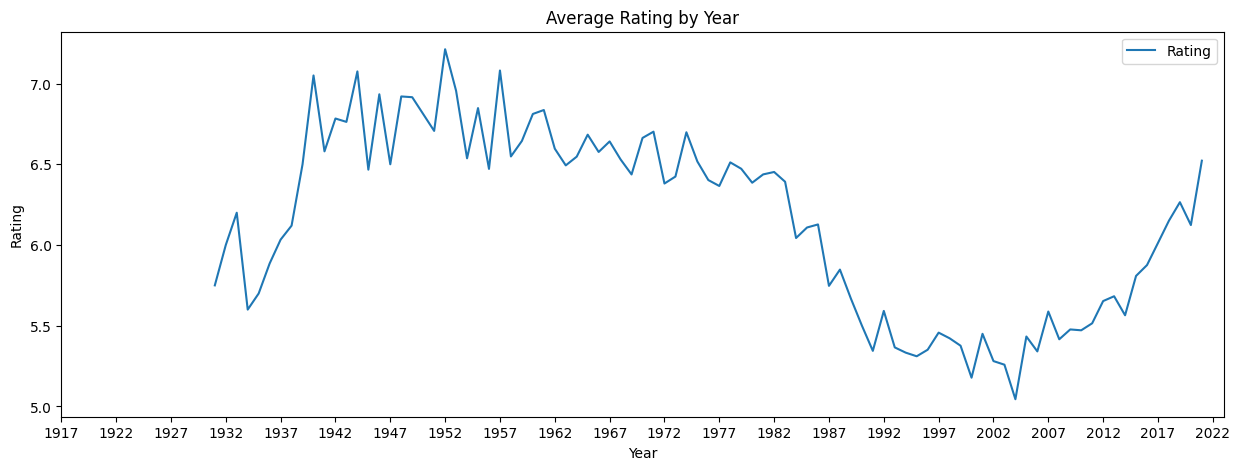

In [27]:

df.groupby('Year')[['Rating']].mean().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel("Rating")
plt.title("Average Rating by Year")
plt.xticks(np.arange(1917,2023,5))
plt.xlim(1917,2023)
plt.show()

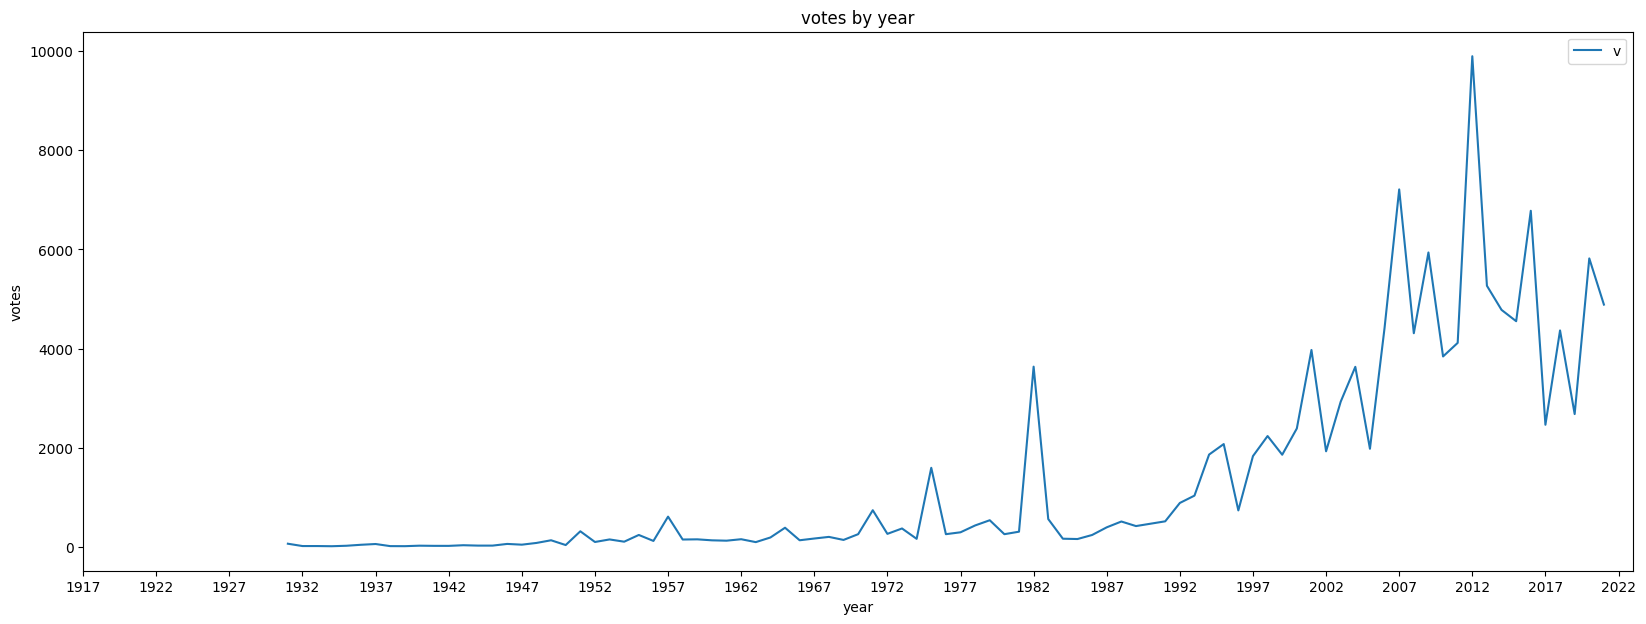

In [28]:
df.groupby('Year')[['Votes']].mean().plot(figsize=(20,7))
plt.xlabel("year")
plt.ylabel("votes")
plt.title("votes by year")
plt.legend("votes")
plt.xticks(np.arange(1917,2023,5))
plt.xlim(1917,2023)
plt.show()

In [29]:
d=df.loc[(df['Rating']>8) & (df['Votes']>10000),["Rating",'Votes','Name']]

# Top 10 Voted Movies

In [30]:
top_10_votes=d.loc[d["Votes"].sort_values(ascending=False)[:10].index]
top_10_votes

C:\Users\indra\AppData\Local\Temp\ipykernel_1280\1569336635.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_10_votes=d.loc[d["Votes"].sort_values(ascending=False)[:10].index]


,Rating,Votes,Name
75,8.4,357889,3 Idiots
8228,8.4,175810,Like Stars on Earth
10882,8.1,168150,PK
3410,8.4,165074,Dangal
11725,8.1,114446,Rang De Basanti
8035,8.1,107234,Lagaan: Once Upon a Time in India
4902,8.2,86355,Gangs of Wasseypur
13635,8.2,85340,Swades
13384,9.1,83029,Soorarai Pottru
1019,8.2,77901,Andhadhun


<Axes: xlabel='count', ylabel='Name'>

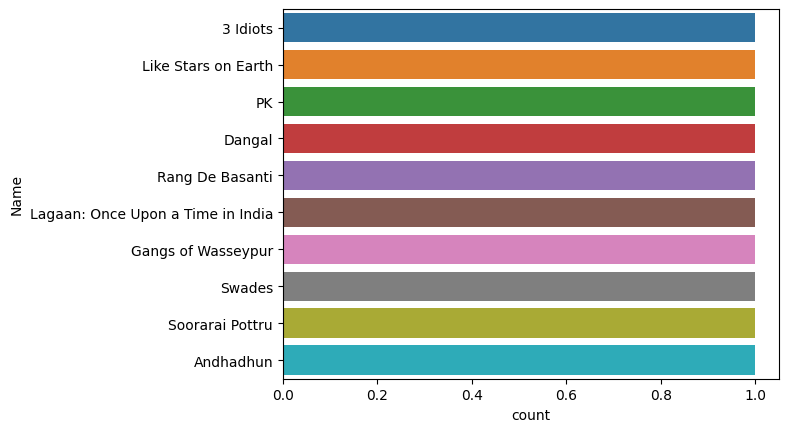

In [31]:
sns.countplot(y=top_10_votes['Name'])

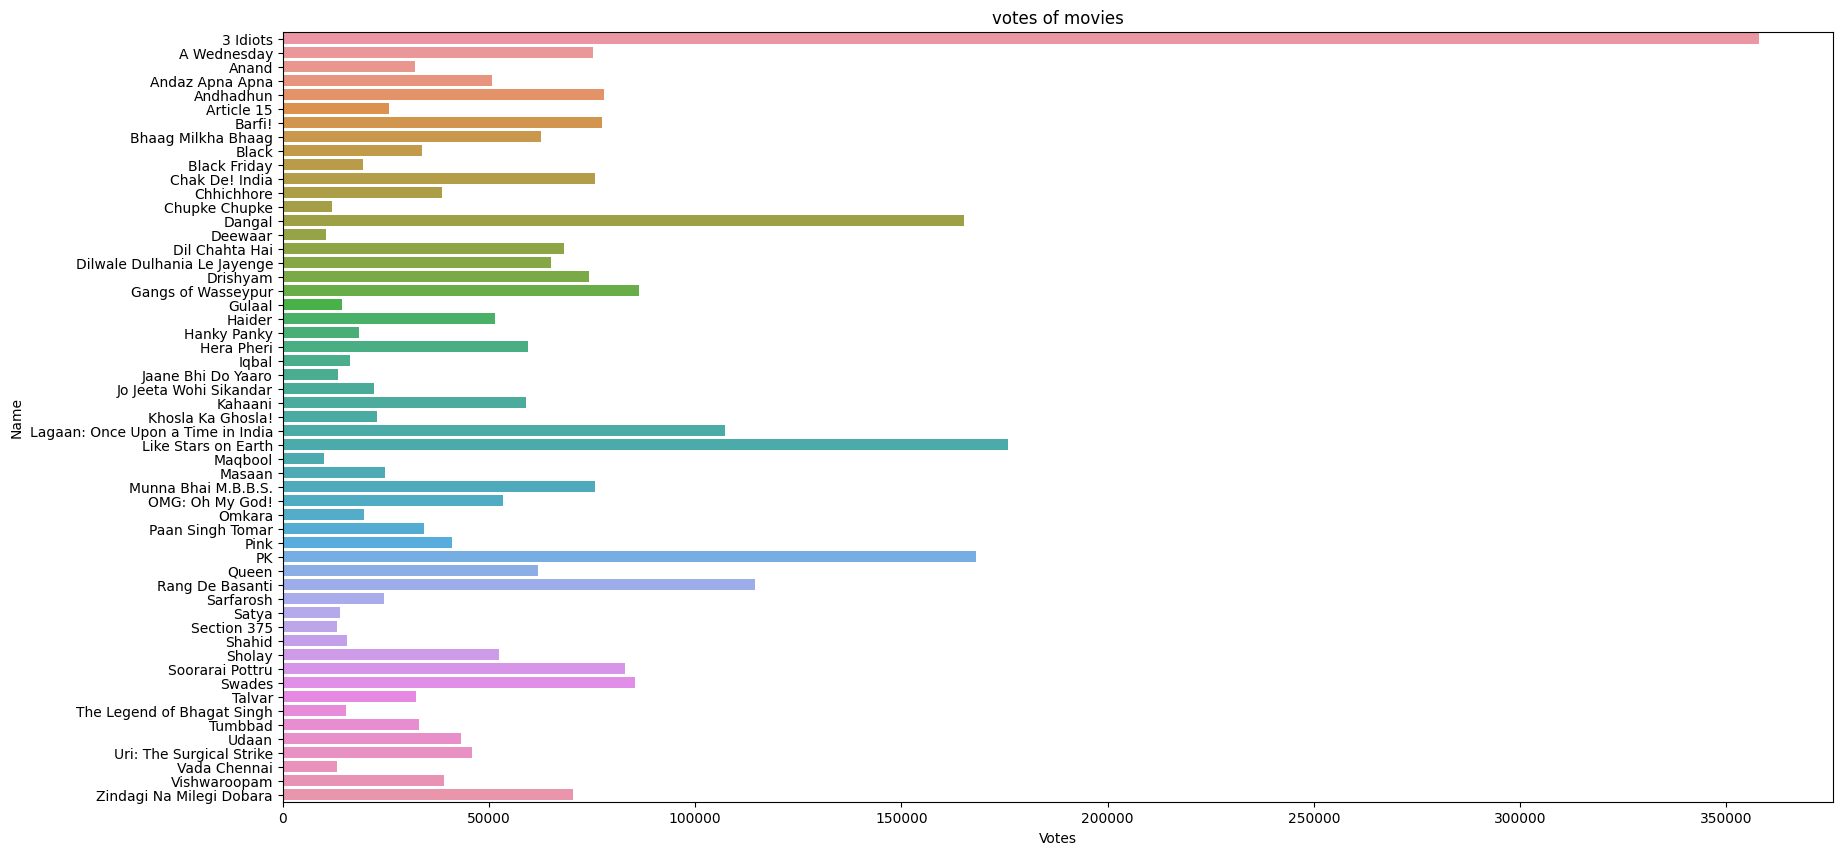

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x=d.Votes,y=d.Name)
plt.title("votes of movies")
plt.show()

<Figure size 1000x2000 with 0 Axes>

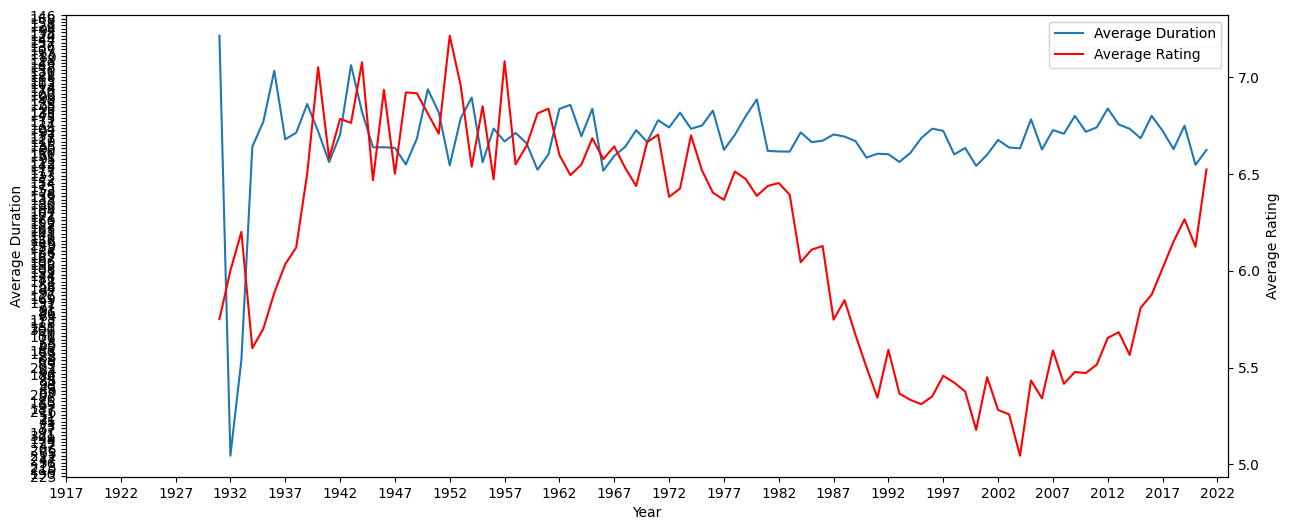

In [33]:
plt.figure(figsize=(10,20))
fig,ax1 = plt.subplots(figsize=(15,6))
sns.lineplot(data=df,x='Year',y='Duration',errorbar=None,ax=ax1,label='Average Duration')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Duration')
ax1.set_xlim(1917,2023)
ax1.set_xticks(np.arange(1917,2023,5))
ax2 = ax1.twinx()
sns.lineplot(data=df,x='Year',y='Rating',errorbar=None,ax=ax2,color='red',label='Average Rating')
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

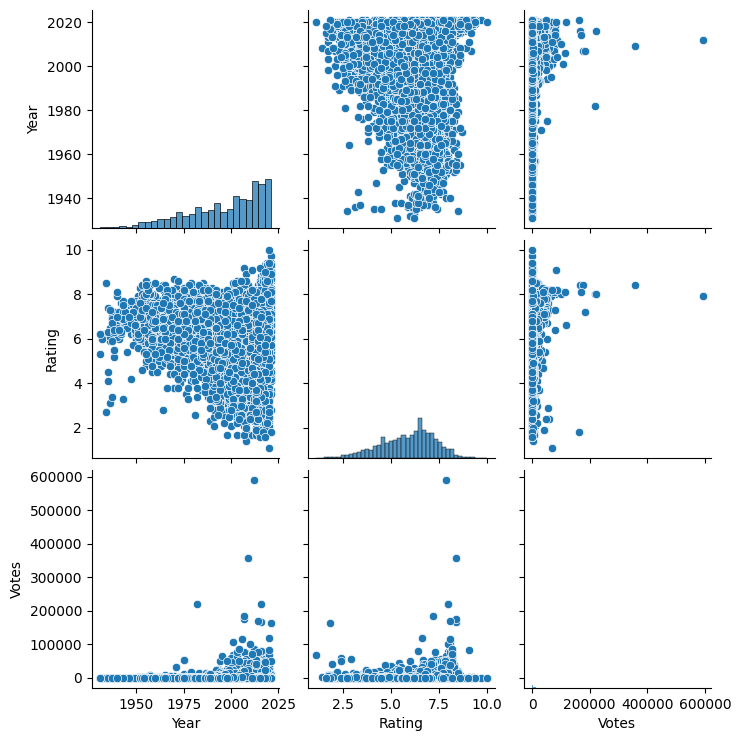

In [34]:
sns.pairplot(df)
plt.show()

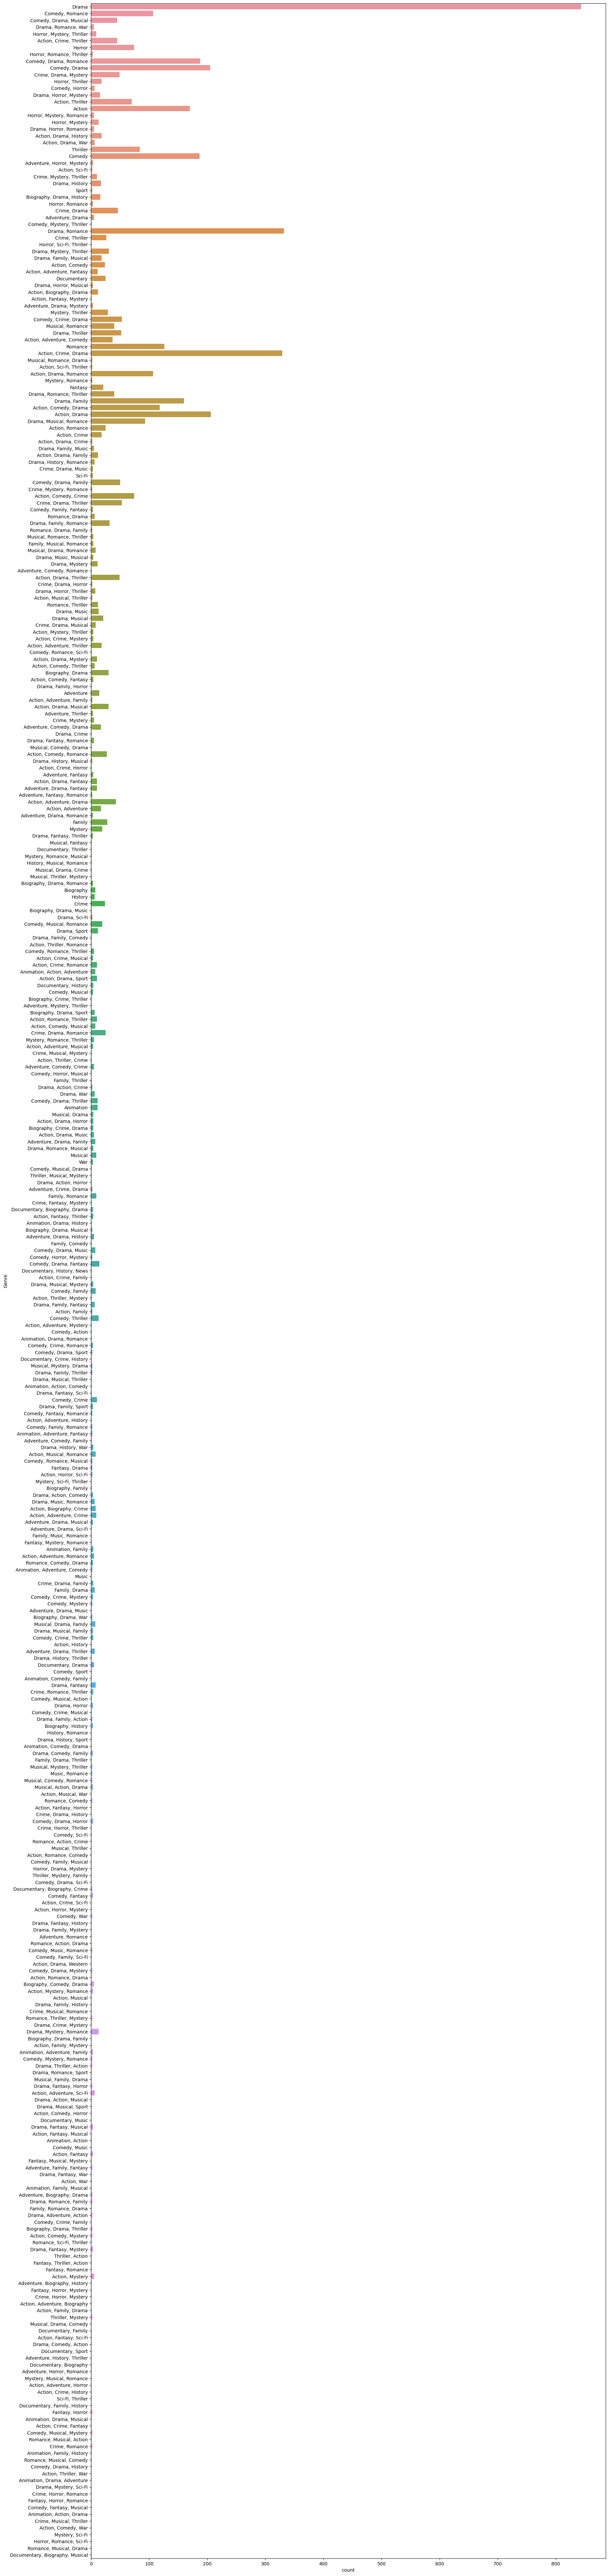

In [35]:
plt.figure(figsize=(20,100))
sns.countplot(y=df.Genre)
plt.show()

In [36]:
genre=df["Genre"]
genre_stack=genre.str.split(",").apply(pd.Series).stack()
genre_stack.index=genre_stack.index.droplevel(-1)
g=[genre.str.split(',').apply(pd.Series)[i].str.strip().value_counts(dropna=False).to_dict() for i in range(3)]
g_dict={k: sum(dic.get(k,0) for dic in g ) for dic in g for k in dic}
genres_count=pd.Series(g_dict).sort_values(ascending=False).drop(np.nan)
genre_rating = {k:df.loc[df['Genre'].str.contains(k),'Rating'].mean().round(1) for k in genres_count.index}
genre_rating = pd.Series(genre_rating).sort_values(ascending=False)
genres_single = pd.concat([genres_count,genre_rating],axis=1).sort_values(by=1,ascending=False).rename(columns={0:'Movie count',1:'Average rating'})
genres_single.sort_values(by='Movie count',ascending=False,inplace=True)

In [37]:
genre_rating

News           8.0
Documentary    7.6
History        6.9
Biography      6.7
Sport          6.5
Family         6.3
Musical        6.2
Music          6.2
Drama          6.1
Animation      6.1
War            6.0
Mystery        5.9
Adventure      5.9
Fantasy        5.8
Crime          5.8
Comedy         5.8
Romance        5.8
Western        5.7
Thriller       5.6
Action         5.5
Sci-Fi         5.3
Horror         4.8
dtype: float64

In [38]:
g_dict

{'Drama': 3796,
 'Action': 1686,
 'Comedy': 1344,
 'Crime': 875,
 'Romance': 1380,
 'Horror': 202,
 'Adventure': 277,
 'Musical': 412,
 'Thriller': 679,
 'Biography': 115,
 'Mystery': 304,
 'Family': 416,
 'Documentary': 48,
 'Animation': 40,
 'Fantasy': 146,
 'History': 99,
 'Sci-Fi': 32,
 'War': 33,
 'Music': 53,
 'Sport': 40,
 nan: 4998,
 'News': 1,
 'Western': 1}

In [39]:
genre_stack

1           Drama
3          Comedy
3         Romance
5          Comedy
5           Drama
           ...   
15503       Drama
15505      Action
15505       Drama
15508      Action
15508       Drama
Length: 11979, dtype: object

In [40]:
genre_df = df.groupby('Genre').agg({'Rating':['mean','count']})
genre_df.reset_index(inplace=True)
genre_df.columns = ['Genre','Average Rating','Movie Count']
genre_df['Average Rating'] = genre_df['Average Rating'].round(1)
genre_df

,Genre,Average Rating,Movie Count
0,Action,5.0,170
1,"Action, Adventure",5.6,17
2,"Action, Adventure, Biography",7.8,1
3,"Action, Adventure, Comedy",5.6,37
4,"Action, Adventure, Crime",5.8,9
...,...,...,...
371,"Thriller, Action",4.3,1
372,"Thriller, Musical, Mystery",7.1,1
373,"Thriller, Mystery",6.2,2
374,"Thriller, Mystery, Family",6.1,1


In [41]:
# it is use for mapping
genre_dict=dict(zip(genre_df["Genre"],genre_df["Average Rating"]))

In [42]:
directors  = df.groupby('Director').agg({'Rating':['mean','count']})
directors.columns = directors.columns.droplevel(0)
directors.reset_index(inplace=True)
directors.columns = ['Director','Average Rating','Movie count']
directors['Average Rating'] = directors['Average Rating'].round(1)
directors.sort_values(by='Movie count',ascending=False,inplace=True)
directors.head()

,Director,Average Rating,Movie count
480,David Dhawan,5.2,41
1090,Mahesh Bhatt,5.8,39
1975,Shakti Samanta,6.6,33
1642,Ram Gopal Varma,5.6,33
731,Hrishikesh Mukherjee,7.3,33


In [43]:
directors

,Director,Average Rating,Movie count
480,David Dhawan,5.2,41
1090,Mahesh Bhatt,5.8,39
1975,Shakti Samanta,6.6,33
1642,Ram Gopal Varma,5.6,33
731,Hrishikesh Mukherjee,7.3,33
...,...,...,...
1021,Krishnadev Yagnik,7.3,1
1019,Krishna Shah,6.3,1
1018,Krishna Mishra,5.6,1
1017,Krishna Kumar,6.2,1


In [44]:
directors_dict = dict(zip(directors['Director'],directors['Average Rating']))

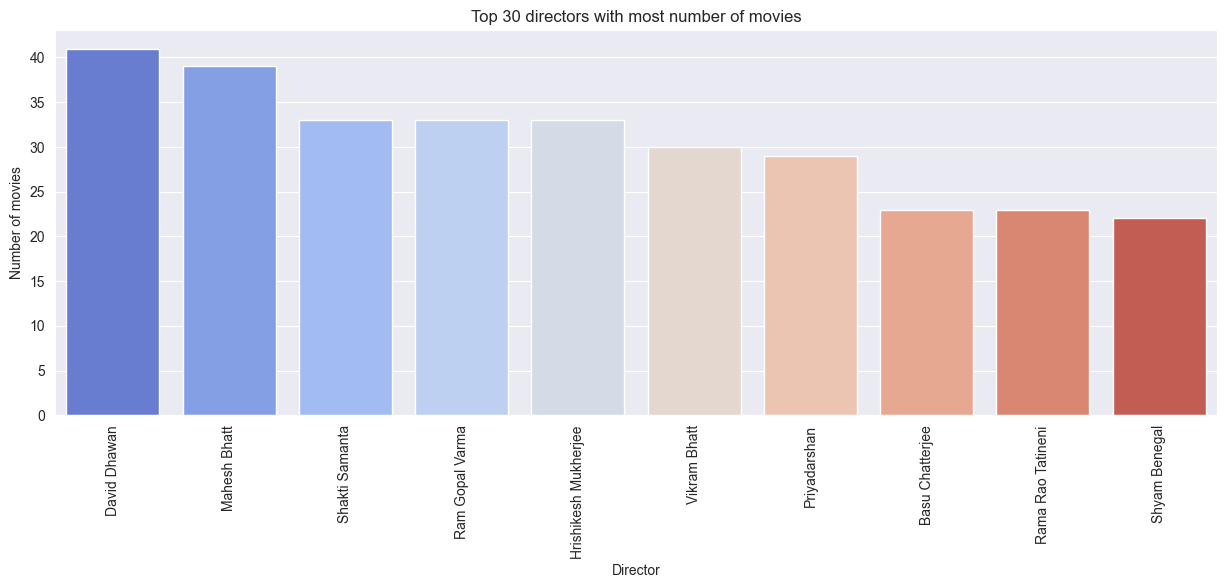

In [45]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.barplot(data=directors.head(10),x='Director',y='Movie count',palette='coolwarm')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.title('Top 30 directors with most number of movies')
plt.show()

In [46]:
df_melted = df.melt(id_vars='Rating', value_name='actor', var_name='role', value_vars=['Actor 1', 'Actor 2', 'Actor 3'])
actor_scores = df_melted.groupby('actor')['Rating'].agg(['mean', 'count'])
actor_scores.reset_index(inplace=True)
actor_scores.columns = ['Actor','Average Score', 'Number of movies']
actor_scores.sort_values('Number of movies', ascending=False, inplace=True)
actor_scores['Average Score']=actor_scores['Average Score'].round(1)
actor_scores

,Actor,Average Score,Number of movies
2510,Mithun Chakraborty,5.5,160
369,Amitabh Bachchan,6.3,148
1165,Dharmendra,5.9,146
696,Ashok Kumar,6.5,124
261,Akshay Kumar,5.5,120
...,...,...,...
1975,Kashish Khurana,6.3,1
1976,Kashmira Irani,7.5,1
1978,Kathana,6.0,1
1980,Kaushal,5.7,1


In [47]:
actor_score_dict = dict(zip(actor_scores['Actor'], actor_scores['Average Score']))

# data preprocessing

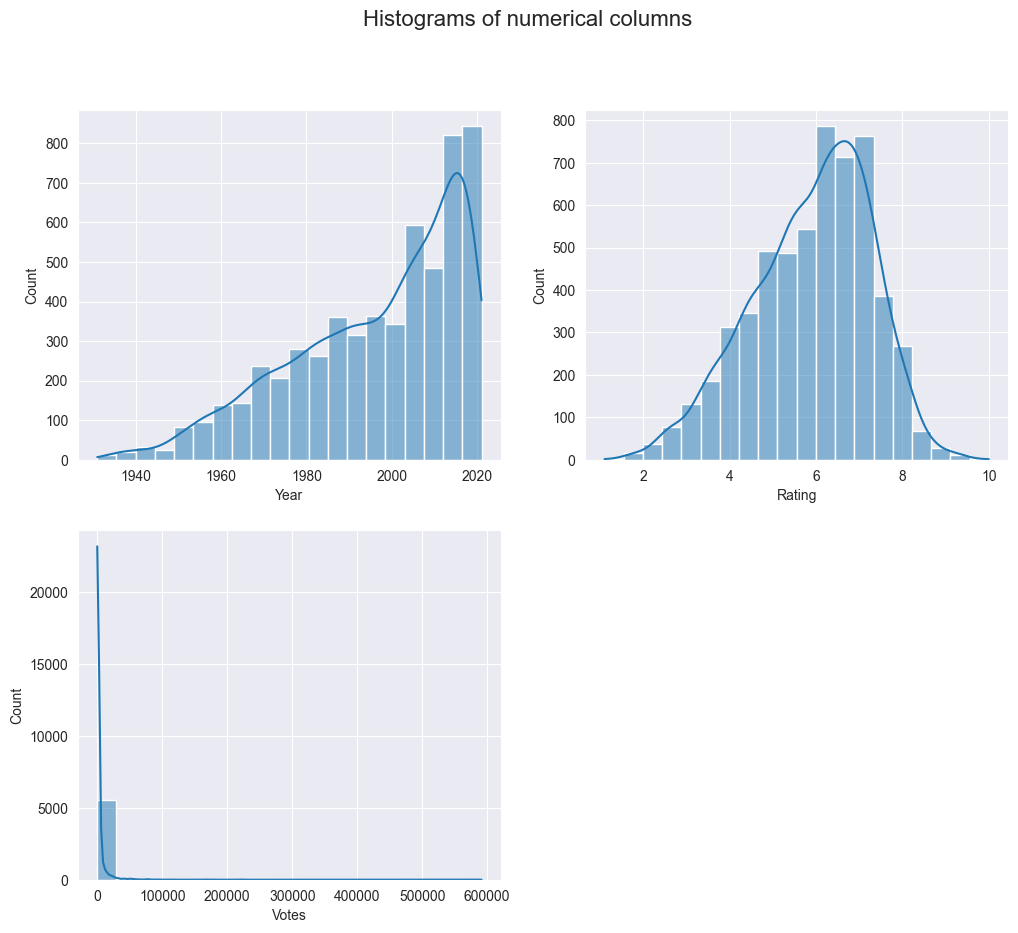

In [48]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()
             

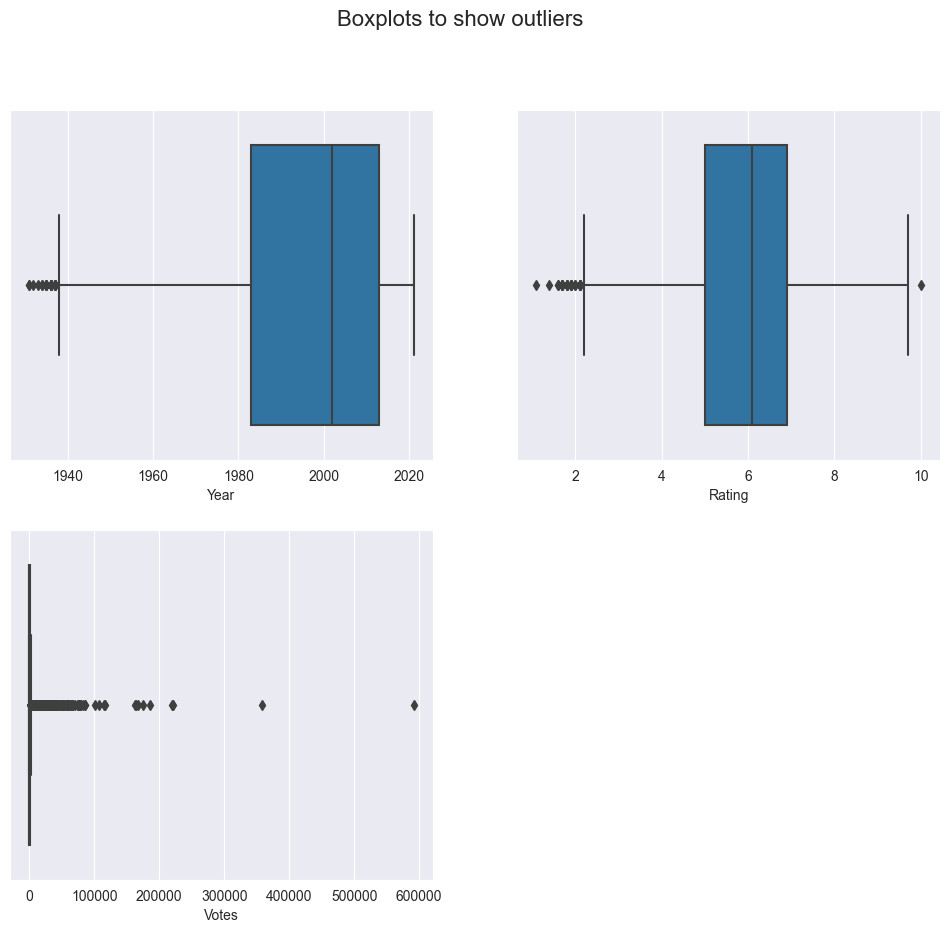

In [49]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots to show outliers', fontsize=16)
plt.show()

In [50]:

num_df = df.select_dtypes(include=np.number)
num_df

,Year,Rating,Votes
1,2019,7.0,8
3,2019,4.4,35
5,1997,4.7,827
6,2005,7.4,1086
8,2012,5.6,326
...,...,...,...
15493,2015,6.1,408
15494,2001,6.2,1496
15503,1989,5.8,44
15505,1999,4.5,655


# i will use con method to transform my feature to make distribution more normal andcontol outliers in data

In [51]:
df_2=df.drop(["Name"],axis=1)
df_2['Genre']=df_2["Genre"].map(genre_dict)
df_2['Director']=df_2["Director"].map(directors_dict)
df_2['Actor 1'] = df_2['Actor 1'].map(actor_score_dict)
df_2['Actor 2'] = df_2['Actor 2'].map(actor_score_dict)
df_2['Actor 3'] = df_2['Actor 3'].map(actor_score_dict)
df_2

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,6.4,7.0,8,7.0,6.6,7.0,7.0
3,2019,110,5.7,4.4,35,4.4,5.7,4.4,4.4
5,1997,147,6.2,4.7,827,5.3,4.9,5.9,6.6
6,2005,142,6.8,7.4,1086,7.4,5.7,5.6,6.5
8,2012,82,5.5,5.6,326,5.6,5.6,5.7,5.6
...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.4,6.1,408,6.1,7.2,6.0,5.8
15494,2001,153,7.0,6.2,1496,7.2,4.6,5.8,6.3
15503,1989,125,5.7,5.8,44,6.3,6.3,6.2,6.0
15505,1999,129,5.5,4.5,655,5.2,5.5,4.9,5.8


In [52]:
pt=PowerTransformer()
qt=QuantileTransformer(output_distribution="normal")

In [53]:
df_2[['Rating','Votes','Year']] = pt.fit_transform(df_2[['Rating','Votes','Year']])
df_2[['Genre','Director','Duration','Actor 1','Actor 2','Actor 3']] = qt.fit_transform(df_2[['Genre','Director','Duration','Actor 1','Actor 2','Actor 3']])

C:\Users\indra\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


# make data more normal and control outliers

<Axes: >

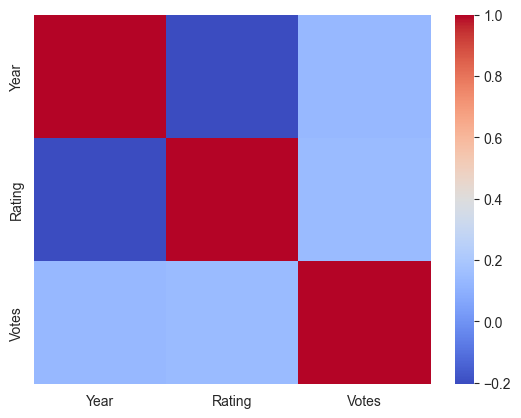

In [54]:
corr_df=df.corr(numeric_only=True)
corr_df["Rating"].sort_values(ascending=False)
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

# now our transformed data are much correleted with the target variable so we readyto build a model

In [55]:
x=df_2.drop('Rating',axis=1)
y=df_2['Rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
lr=LinearRegression()


In [56]:
model=lr.fit(x_train,y_train)

In [57]:
y_pred=model.predict(x_test)
y_pred

array([-0.53929602, -0.12692366,  0.98032636, ...,  0.69995284,
       -1.35456807,  1.53471057])

In [58]:
print('mean squared error ',mean_squared_error(y_test,y_pred))

mean squared error  0.23632623488583945


In [59]:
print("mean absolute error",mean_absolute_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))

mean absolute error 0.36994968775040243
r2 score 0.762288530093718


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
x=df_2.drop('Rating',axis=1)
y=df_2['Rating']
model=LinearRegression()
score=cross_val_score(model,x,y,cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f"%(score.mean(),score.std()))

0.75 accuracy with a standard deviation of 0.01


# 75 percent score after performing cross validation